# Predicting NASDAQ Stock Index Price
The objective of the project is for exploration and testing of different methods of machine learning, more specifically, methods learned in class and various other methods practiced throughout the market. There are many implications that you can acquire from the robust data available to investors we wanted to determine if we could exploit some of these ideas so that we might have a better understanding of how the market performs and if it was possible to predict prices. It is well known that it is challenging to predict stock market prices due to the presence of volatility, nevertheless, we wanted to encounter and explore this challenge for ourselves. We used multiple different methods to determine the best features to use for the model then we deployed some models using neural networks to help us understand the behaviors of the ever changing market place.

Accurate prediction of the stock market would be tremendous for the financial industry, or anybody for that matter. In reality, we know that this is a very difficult task and no one has quite been able to perfect the algorithm, that being said, we only hope to be inspired by the project to develop a better model in the future based on the same ideas that we deployed for this project. The number one rule when talking about the market is 'never lose money'. Risk comes from those that are not prepared or those that don't understand the data. Technology is far from being able to predict the future, but if we can understand the data and determine a way to leverage its insights we can make better investments with higher returns.

“Forecasts may tell you a great deal about the forecaster; they tell you nothing about the future.” -Warren Buffet


# Data
NASDAQ index data is available online through various financial data aggregators, 
we used Alpha Vantage API to procure our data. We collected the obvious ones: 'Open', 'Close' etc. but we also 
wanted to see if factors like method of moments or weighted moving average would help us in better predicting the 'close' price. 
The time-series dataset contains 2518 instances (days),approximately 10 years worth of data. Each instance in the
data set contains 24 features for which we will leverage in making predictions.


## Import Statements and Data Import

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from pandas import Series
import time
import csv 
import json
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from yellowbrick.features.pca import PCADecomposition
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from ta import *
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from IPython.display import display
import io
plt.rcParams['figure.figsize'] = (18, 12)
# file='NASDAQ_FEATURES.csv'

## Setting up the dataframes for future use

In [271]:
data1=pd.DataFrame()
data1=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data1=data1.reset_index(drop=True)
data2=pd.DataFrame()
data2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data2=data2.reset_index(drop=True)
data3=pd.DataFrame()
data3=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data3=data3.reset_index(drop=True)
data4=pd.DataFrame()
data4=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data4=data4.reset_index(drop=True)
data5=pd.DataFrame()
data5=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data5=data5.reset_index(drop=True)
# print(data1.head())
# print('Number of observations:' ,len(data1))
# print('Number of observations:' ,len(data2))
# print('Number of observations:' ,len(data3))
# print('Number of observations:' ,len(data4))
# print('Number of observations:' ,len(data5))

## Setting the dataframes to the same structure/information so that we can use the individual data and accompanying features

In [272]:
# Data1 setup adding high diff, low diff & daily diff
# High Difference 
high_diff1=data1['high']-data1['open']
data1['high_diff']=high_diff1
# low difference
low_diff1=data1['open']-data1['low']
data1['low_diff']=low_diff1
# Daily Difference
daily_diff1=data1['close']-data1['open']
data1['daily_diff']=daily_diff1
# Data2 setup adding high diff, low diff & daily diff
# High Difference 
high_diff2=data2['high']-data2['open']
data2['high_diff']=high_diff2
# low difference
low_diff2=data2['open']-data2['low']
data2['low_diff']=low_diff2
# Daily Difference
daily_diff2=data2['close']-data2['open']
data2['daily_diff']=daily_diff2
# Data3 setup adding high diff, low diff & daily diff
# High Difference 
high_diff3=data3['high']-data3['open']
data3['high_diff']=high_diff3
# low difference
low_diff3=data3['open']-data3['low']
data3['low_diff']=low_diff3
# Daily Difference
daily_diff=data3['close']-data3['open']
data3['daily_diff']=daily_diff
# Data4 setup adding high diff, low diff & daily diff
# High Difference 
high_diff4=data4['high']-data4['open']
data4['high_diff']=high_diff4
# low difference
low_diff4=data4['open']-data4['low']
data4['low_diff']=low_diff4
# Daily Difference
daily_diff=data4['close']-data4['open']
data4['daily_diff']=daily_diff
# Data5 setup adding high diff, low diff & daily diff
# High Difference 
high_diff5=data5['high']-data5['open']
data5['high_diff']=high_diff5
# low difference
low_diff5=data5['open']-data5['low']
data5['low_diff']=low_diff5
# Daily Difference
daily_diff=data5['close']-data5['open']
data5['daily_diff']=daily_diff
# print(data1.head(2))
# print(data2.head(2))
# print(data3.head(2))
# print(data4.head(2))
# print(data5.head(2))
 #I made this list just case we need to use it later to build model   &&   #  maybe take out daily change percentage
feature_list = ['open','high','low', 'close', 'volume','RSI','SMA','EMA',\
    'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
        'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down','daily_diff','high_diff','low_diff']
# np.isnan(data.values.any())

## Reason why we are using Lasso Regression (write something here lol)

## LASSO REGRESSION
# May be worth it to look into improving this regressor


In [273]:

Xs = data1.drop(['daily_diff','open','close','high','low'], axis=1)
# Xs = data1.drop(['daily_diff','open','close'], axis=1)
# print(Xs.head())


y = data1['daily_diff'].values.reshape(-1,1)

lasso = Lasso(alpha=.1,normalize=False)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Below are all the scoring methods for lasso regressors...I do think that we need to improve this part....But we can do it later.
# ‘neg_mean_squared_log_error’
# 'neg_mean_squared_error'
# r2
# ‘explained_variance’

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

print("The best parameter is:", lasso_regressor.best_params_)
print("The best score is:", lasso_regressor.best_score_)

/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

The best parameter is: {'alpha': 0.001}
The best score is: -0.07704525563023688


/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## PRE-PROCESSING For Lasso Regressor

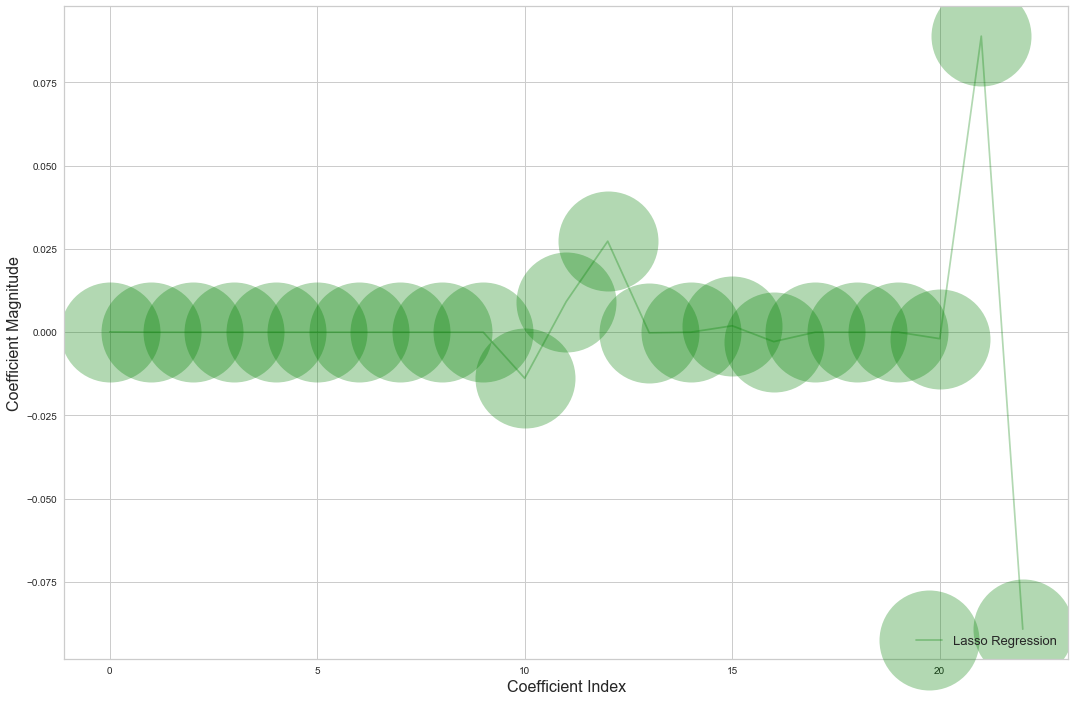

MSE for lasso Regression: 0.5201994266454731
Score for Lasso Regression: 0.39297965000078183
Lasso Coefficients: [ 9.21944271e-05  3.59782397e-08 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.38234750e-02  9.19372668e-03
  2.73128400e-02 -1.87703613e-04 -0.00000000e+00  1.91830013e-03
 -2.83965144e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.94790622e-03  8.88911718e-02 -8.91638683e-02]
Lasso Sparse coefficients:   (0, 0)	9.219442708359553e-05
  (0, 1)	3.597823974305951e-08
  (0, 10)	-0.013823474950603902
  (0, 11)	0.00919372668481109
  (0, 12)	0.027312840031070998
  (0, 13)	-0.00018770361275321354
  (0, 15)	0.0019183001342712703
  (0, 16)	-0.0028396514363569895
  (0, 20)	-0.0019479062195889504
  (0, 21)	0.08889117182530523
  (0, 22)	-0.08916386827810002
Lasso Intercept: [-1.16922251]


In [288]:
# Separate the train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.10, random_state=10)
#Implement LASSO REGRESSION
lassoReg = Lasso(alpha=0.15, normalize=False)
lassoReg.fit(X_train,y_train)
pred_cv = lassoReg.predict(X_test)
# RETRIEVE MSE
plt.plot(lassoReg.coef_,alpha=0.3,linestyle='-',marker='o',markersize=100,color='green',label='Lasso Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

mse = np.mean((pred_cv - y_test)**2)
print("MSE for lasso Regression:",mse)
print("Score for Lasso Regression:",lassoReg.score(X_test,y_test))
coeffs = lassoReg.coef_       
print("Lasso Coefficients:",coeffs)
coeffs = lassoReg.sparse_coef_  
print("Lasso Sparse coefficients:",coeffs)
coeffs = lassoReg.intercept_    
print("Lasso Intercept:",coeffs)


## Need to fix this to the values that we are receiving for this project

Looking @ the result above we notice that the results give us sparse coefficients for 'Open','Close' & 'Volume'. 
We are going to come back and build a model with just those features in the near future but for now, we just want to see 
how the model performs if we use all the features of the data (28 total). 

$$•OpenCoef_=0.96322411$$
$$•CloseCoef_=0.00533752$$
$$•VolumeCoeff_=0.00120249$$
$$•LassoIntercept=69.49548245 $$
$$The best parameter is: {'alpha': 10}$$
$$The best score is: 0.999082309448763$$
BUT...The MSE is high so we do not want to rely on this model.


# The score of this  LASSO Regressor model is bad.




## Make a list of dataframe objects so that we can iterate over them to perform needed tasks 

In [289]:
data_list=[data1,data2,data3,data4,data4,data5]

## First we need to normalize the data for later use 

In [290]:

# feature_list = ['close','volume','RSI','SMA','EMA',\
#     'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
#         'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down','daily_diff']
def get_normalized_data(data,feature_list,scaler=None):
    
    # Initialize a scaler, then apply it to the features
    if scaler=='MinMaxScaler()':
        scaler = MinMaxScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])
    if scaler=='StandardScaler()':
        scaler=StandardScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])

    return data
normalized_stocks_list=[]
for data in data_list:
    normalized_stocks=get_normalized_data(data,feature_list,scaler='MinMaxScaler()')
    normalized_stocks_list.append(normalized_stocks)



/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: Data

## Create new dataframe object which have all been normalized

In [291]:
data1_normalized=normalized_stocks_list[0]
data2_normalized=normalized_stocks_list[1]
data3_normalized=normalized_stocks_list[2]
data4_normalized=normalized_stocks_list[3]
data5_normalized=normalized_stocks_list[4]
# print(data1_normalized.head(1))
# print(data2_normalized.head(1))
# print(data3_normalized.head(1))
# print(data4_normalized.head(1))
# print(data5_normalized.head(1))

## May be able to find another way to normalize the data or something to see how the following algorithms respond to the different transforms....

Score of the model is: 9.423058548393781


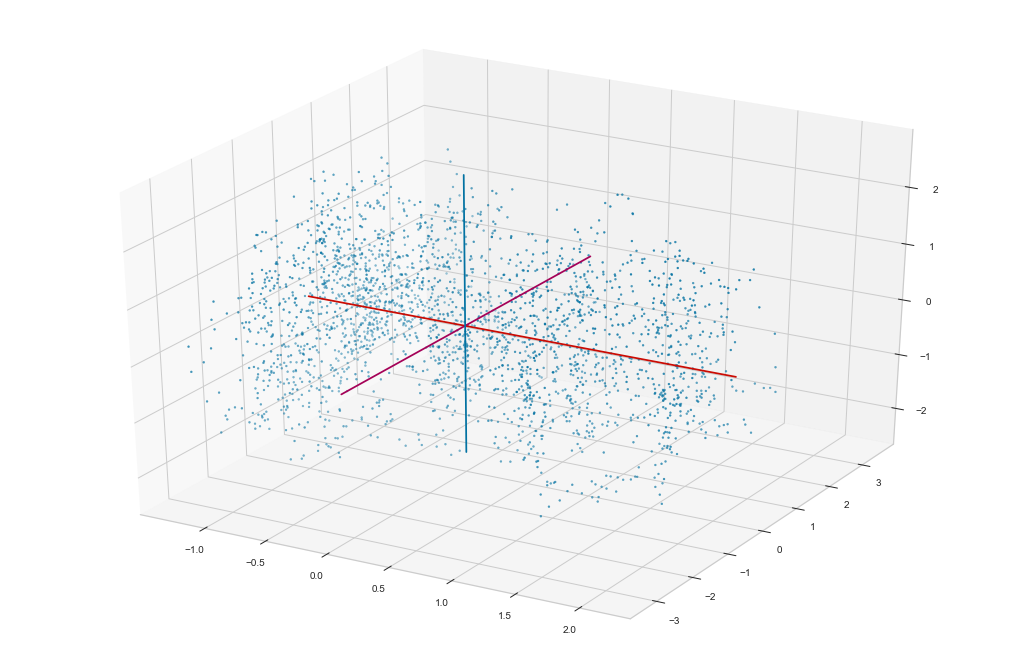

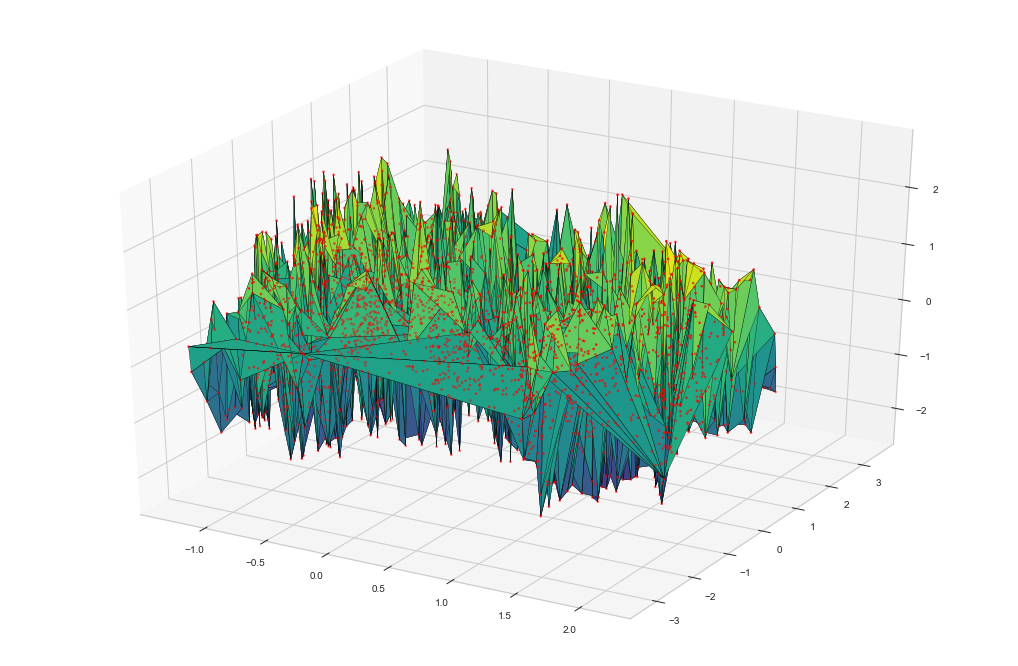

array([9.30298324e-01, 6.92460418e-02, 1.74762917e-04])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

PCA: PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)
explained variance ratio: [9.30298324e-01 6.92460418e-02 1.74762917e-04]


In [292]:
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import IncrementalPCA
def plotPCA(data1_normalized):
    pca = PCA(n_components=3,whiten=True)
    principalComponents = pca.fit_transform(data1_normalized)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    finalDf = pd.concat([principalDf, data1_normalized[['daily_diff']]], axis = 1)
#     ipca = IncrementalPCA(n_components=3, batch_size=3)
#     principalComponents_incremental=ipca.fit(data1_normalized)
#     principalDf_incremental = pd.DataFrame(data = principalComponents_incremental, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], cmap="Set2_r", s=4)
    score=pca.score(data1_normalized)
    print("Score of the model is:",score)
    # make simple, bare axis lines through space:
    xAxisLine = ((min(principalDf['Principal Component 1']), max(principalDf['Principal Component 1'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(principalDf['Principal Component 2']), max(principalDf['Principal Component 2'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'm')
    zAxisLine = ((0, 0), (0,0), (min(principalDf['Principal Component 3']), max(principalDf['Principal Component 3'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
    plt.show()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'],cmap='viridis', edgecolor='black')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], c='red', cmap='viridis', linewidth=0.3,s=5)
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
# BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
# OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
# PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, 
# RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, 
# Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, 
# twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


    




    plt.show()
    display(pca.explained_variance_ratio_)
    display(pca)
    explained_varianceRatio=pca.explained_variance_ratio_
    print("PCA:",pca)
    print("explained variance ratio:",explained_varianceRatio)
plotPCA(data1_normalized.drop(['Day'],axis=1))
# print(data1_normalized.head(1))

## Explanation of the PCA results...

## Principal Component Analysis

## Correlation matrix and cluster heat map of the Features & breakdown

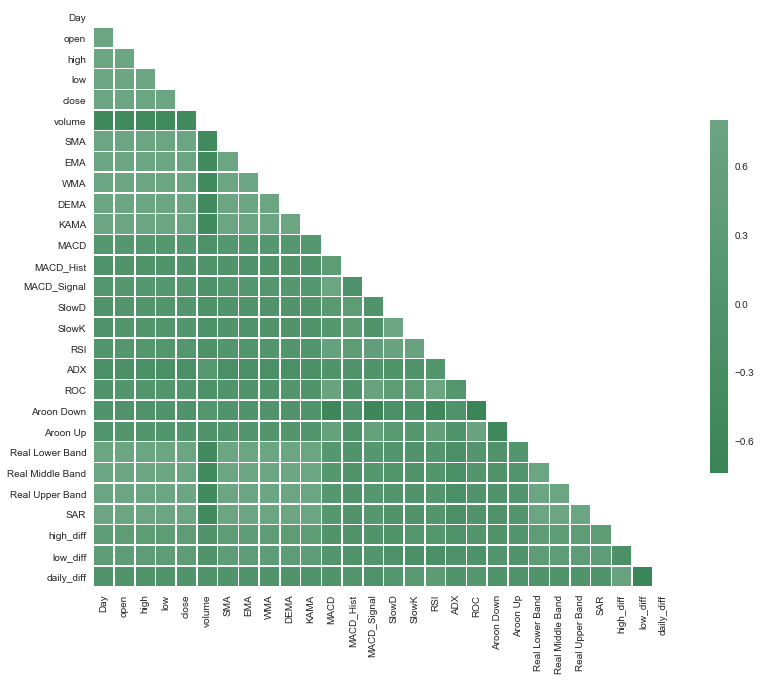

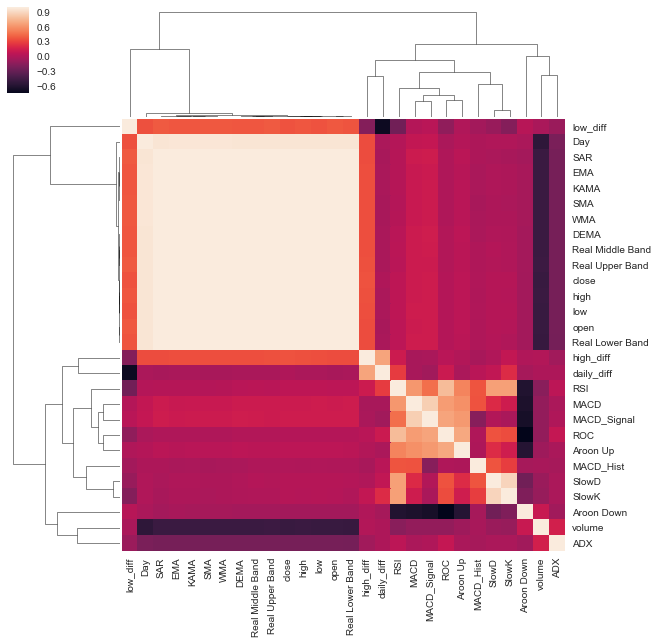

In [293]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = data1_normalized.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,13))
cmap = sns.diverging_palette(500, 900, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)

## Linear Regression

In [294]:
# data_2=pd.DataFrame()
# index=0
# data_2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col=index)
# # print(data_2)

def scale_range(x, input_range, target_range):
    
    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range
def train_test_split_linear_regression(data2_normalized):
    
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    # fix this later
    for index, row in data2_normalized.iterrows():
        # print([np.array(row['close'])])
        feature.append([row['Day']])
        label.append([(row['daily_diff'])])
        

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .2
    split = int(math.floor(len(data2_normalized['Day']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range
# data
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(data1_normalized.drop(['open','close','high','low'],axis=1))


## Build LinReg Model

In [295]:
def build_model(X, y):
    
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod
def predict_prices(model, x, label_range):
    
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()
print("Open   --- mean :", np.mean(data2_normalized['open']),  "  \t Std: ", np.std(data2_normalized['open']),  "  \t Max: ", np.max(data2_normalized['open']),  "  \t Min: ", np.min(data2_normalized['open']))
print("Close  --- mean :", np.mean(data2_normalized['close']), "  \t Std: ", np.std(data2_normalized['close']), "  \t Max: ", np.max(data2_normalized['close']), "  \t Min: ", np.min(data2_normalized['close']))
print("Volume --- mean :", np.mean(data2_normalized['volume']),"  \t Std: ", np.std(data2_normalized['volume']),"  \t Max: ", np.max(data2_normalized['volume']),"  \t Min: ", np.min(data2_normalized['volume']))





Open   --- mean : 0.37273005190781383   	 Std:  0.29165691051358045   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.37529300798953413   	 Std:  0.29199697017716814   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.06932781950905381   	 Std:  0.06405387015851811   	 Max:  1.0   	 Min:  0.0


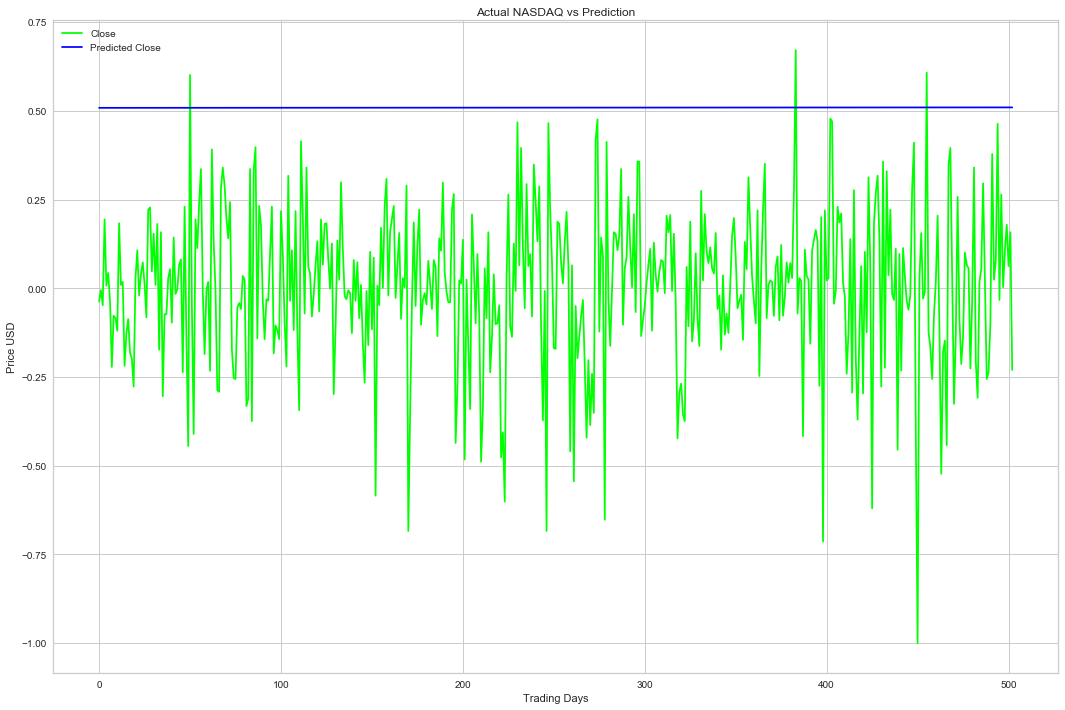

Model Coefficient: [[0.00633899]]
Mean squared error: 0.27
R2= -0.25


In [296]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
def plot_prediction(actual, prediction, title='Actual NASDAQ vs Prediction', y_label='Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()
# Building the model for simple linear regression
model=build_model(X_train,y_train)
simple_predictions=predict_prices(model,X_test, label_range)
plot_prediction(y_test,simple_predictions)
print('Model Coefficient:',model.coef_)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Mean squared error: %.2f"
      % mean_squared_error(X_train, y_train))
print('R2= %.2f' % r2_score(X_train, y_train))



## Preprocessing for LSTM model(s)

In [297]:
import os
# normalized_stocks=data_2
# normalized_stocks=normalized_stocks.drop('Day',1)
# normalized_stocks=get_normalized_data(normalized_stocks,feature_list,scaler='MinMaxScaler()')
# display(normalized_stocks.shape)
# display(normalized_stocks.head())
data1_normalized=data1_normalized.drop(['SAR'],axis=1)

In [303]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=30, unroll_length=50):
    
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['close'].as_matrix()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['close'].as_matrix()

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=12):
    
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)
print(data1_normalized.head(3))
xTrain, xTest,yTrain, yTest = train_test_split_lstm(data1_normalized.drop(['Day','high','low'],axis=1), 5)

unroll_length = 60

xTrain = unroll(xTrain, unroll_length)
xTest = unroll(xTest, unroll_length)
yTrain = yTrain[-xTrain.shape[0]:]
yTest = yTest[-xTest.shape[0]:]


## Get the shapes of the data
print("x_train", xTrain.shape)
print("y_train", yTrain.shape)
print("x_test", xTest.shape)
print("y_test", yTest.shape)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

   Day      open      high       low     close    volume       SMA       EMA  \
0    1  0.020563  0.017348  0.019644  0.018891  0.148011  0.010972  0.011037   
1    2  0.023161  0.024354  0.023975  0.025000  0.224662  0.012348  0.011844   
2    3  0.020676  0.024285  0.024083  0.028959  0.210475  0.013756  0.013068   

        WMA      DEMA  ...       ADX     ROC  Aroon Down  Aroon Up  \
0  0.011671  0.010676  ...  0.133225 -7.0098    0.533333  0.100000   
1  0.012921  0.012063  ...  0.124542 -4.5966    0.500000  0.066667   
2  0.013693  0.014007  ...  0.116151 -1.9259    0.466667  0.033333   

   Real Lower Band  Real Middle Band  Real Upper Band  high_diff  low_diff  \
0         0.026435          0.017263         0.014376   0.001382  0.071976   
1         0.024949          0.018319         0.017831   0.083030  0.043973   
2         0.024247          0.020477         0.022664   0.127811  0.000956   

   daily_diff  
0    0.469777  
1    0.502651  
2    0.563097  

[3 rows x 27 columns

/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## Testing multiple activation function + optimizer + layers with different activation functions 
## Note: We will keep the ones that produce the most favorable results

In [304]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('sigmoid'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.01)

predictions = model.predict(xTest)

compilation time :  0.0549929141998291
Train on 2278 samples, validate on 24 samples
Epoch 1/5
2278/2278 [==============================] - 56s 25ms/step - loss: 0.0099 - val_loss: 0.0024
Epoch 2/5
2278/2278 [==============================] - 37s 16ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 3/5
2278/2278 [==============================] - 36s 16ms/step - loss: 0.0013 - val_loss: 4.1342e-04
Epoch 4/5
2278/2278 [==============================] - 36s 16ms/step - loss: 0.0012 - val_loss: 3.3396e-04
Epoch 5/5
2278/2278 [==============================] - 37s 16ms/step - loss: 6.4773e-04 - val_loss: 0.0018


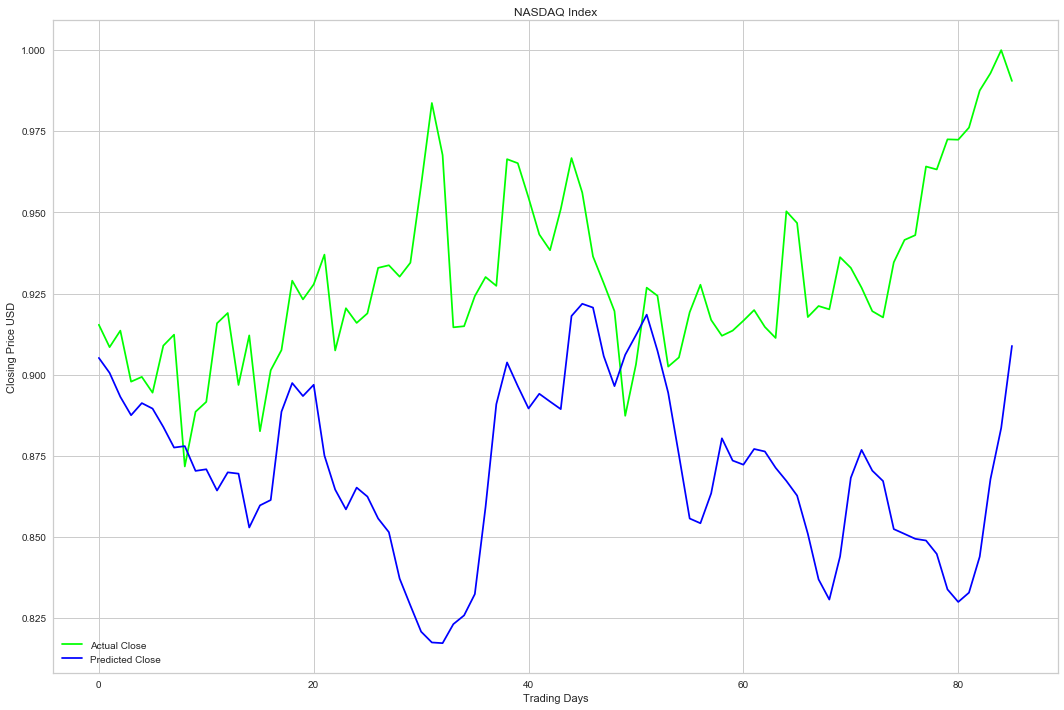

Train Score: 0.00147946 MSE (0.03846378 RMSE)
Test Score: 0.00508032 MSE (0.07127636 RMSE)


In [305]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

## Pretty decent results on the last model - Continuing to investigate the efficacy of the activation function(s) & optimizers

In [306]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('sigmoid'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

compilation time :  0.04184603691101074
Train on 2232 samples, validate on 70 samples
Epoch 1/5
2232/2232 [==============================] - 56s 25ms/step - loss: 0.0073 - val_loss: 0.0020
Epoch 2/5
2232/2232 [==============================] - 36s 16ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 3/5
2232/2232 [==============================] - 36s 16ms/step - loss: 8.7642e-04 - val_loss: 0.0016
Epoch 4/5
2232/2232 [==============================] - 36s 16ms/step - loss: 8.8799e-04 - val_loss: 0.0011
Epoch 5/5
2232/2232 [==============================] - 36s 16ms/step - loss: 5.2008e-04 - val_loss: 4.7759e-04


## Plot the Basics LSTM model before improvement 

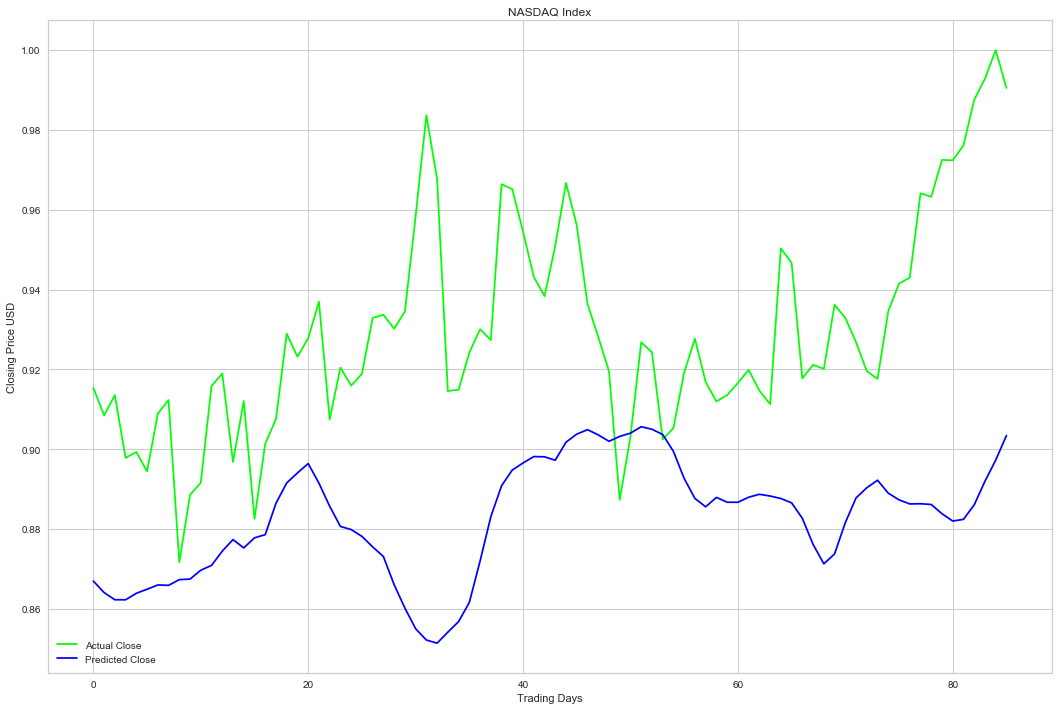

Train Score: 0.00041297 MSE (0.02032171 RMSE)
Test Score: 0.00292078 MSE (0.05404423 RMSE)


In [307]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [323]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('tanh'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.0055)

predictions = model.predict(xTest)

compilation time :  0.04484295845031738
Train on 2290 samples, validate on 12 samples
Epoch 1/5
2290/2290 [==============================] - 58s 25ms/step - loss: 0.0114 - val_loss: 0.0074
Epoch 2/5
2290/2290 [==============================] - 37s 16ms/step - loss: 0.0018 - val_loss: 0.0058
Epoch 3/5
2290/2290 [==============================] - 37s 16ms/step - loss: 0.0010 - val_loss: 4.7934e-04
Epoch 4/5
2290/2290 [==============================] - 37s 16ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/5
2290/2290 [==============================] - 37s 16ms/step - loss: 0.0011 - val_loss: 2.9054e-04


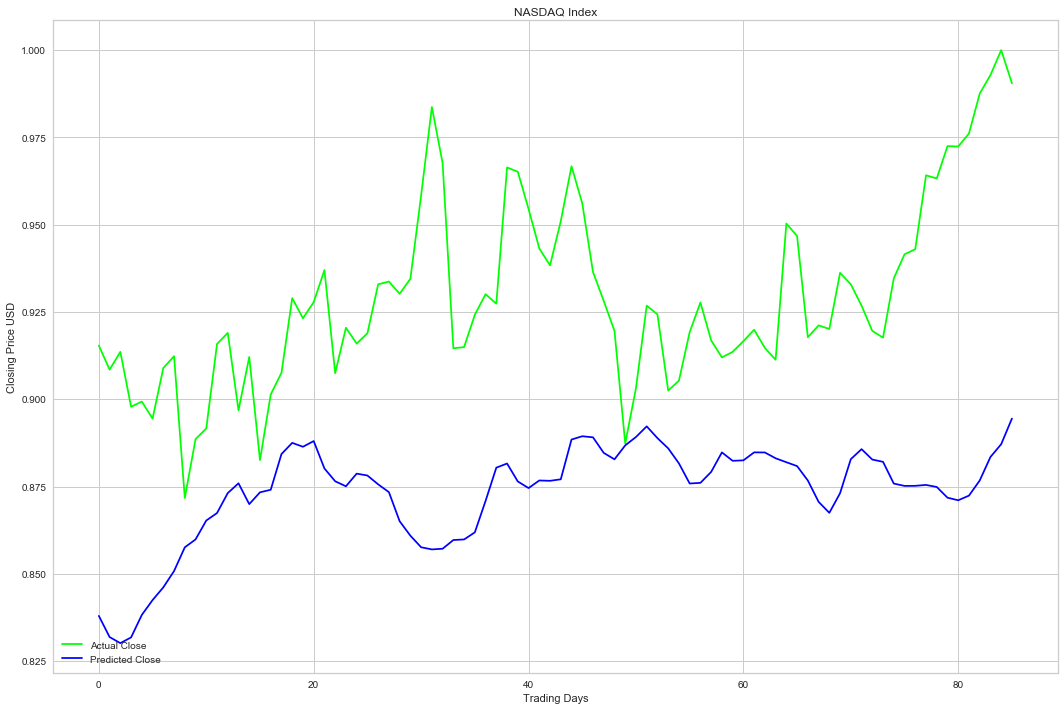

Train Score: 0.00085868 MSE (0.02930320 RMSE)
Test Score: 0.00384349 MSE (0.06199588 RMSE)


In [324]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [330]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('tanh'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.0055)

compilation time :  0.03694295883178711
Train on 2289 samples, validate on 13 samples
Epoch 1/5
2289/2289 [==============================] - 60s 26ms/step - loss: 0.0117 - val_loss: 0.0019
Epoch 2/5
2289/2289 [==============================] - 46s 20ms/step - loss: 0.0017 - val_loss: 2.2083e-04
Epoch 3/5
2289/2289 [==============================] - 37s 16ms/step - loss: 9.6626e-04 - val_loss: 2.7510e-04
Epoch 4/5
2289/2289 [==============================] - 37s 16ms/step - loss: 0.0014 - val_loss: 6.9093e-04
Epoch 5/5
2289/2289 [==============================] - 37s 16ms/step - loss: 5.5153e-04 - val_loss: 5.3700e-04


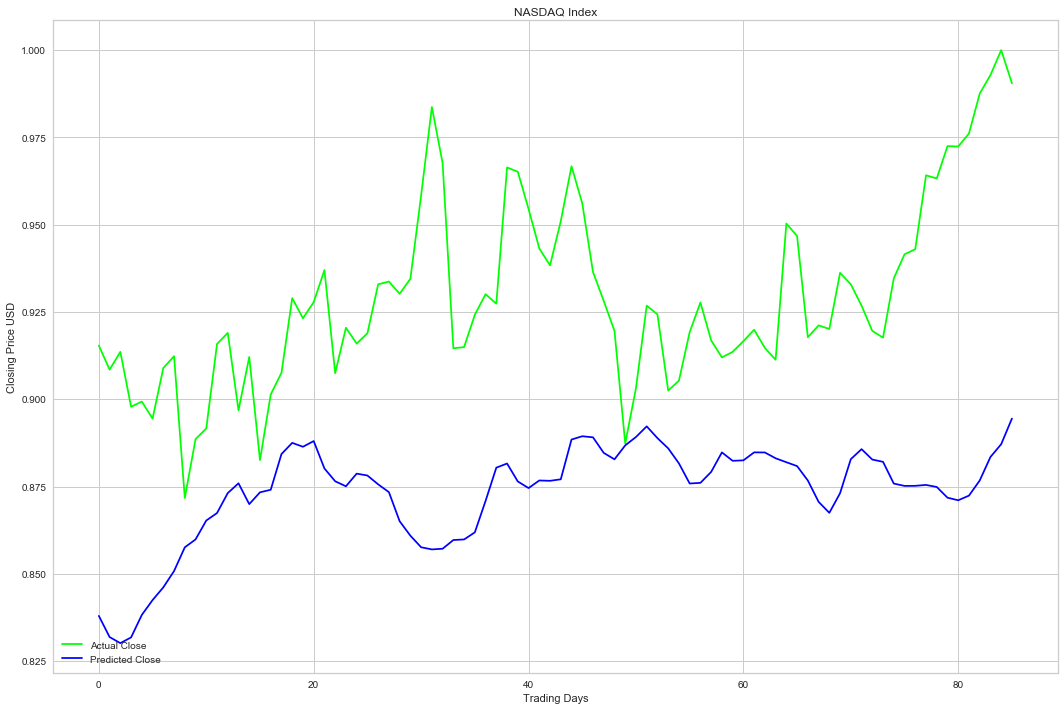

Train Score: 0.00068096 MSE (0.02609525 RMSE)
Test Score: 0.00971100 MSE (0.09854441 RMSE)


In [331]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [357]:
from keras.optimizers import SGD
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('elu'))
    model.add(Dropout(0.3))
    model.add(Dense(
        units=1))
    model.add(Activation('softmax'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('sigmoid'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
# Below is an optimizer for stochastic gradient descent
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=sgd,
#               metrics=['accuracy'])
# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=10,validation_split=.01)

compilation time :  0.040580034255981445
Train on 2278 samples, validate on 24 samples
Epoch 1/10
2278/2278 [==============================] - 71s 31ms/step - loss: 0.1141 - val_loss: 0.0655
Epoch 2/10
2278/2278 [==============================] - 38s 17ms/step - loss: 0.0988 - val_loss: 0.0857
Epoch 3/10
2278/2278 [==============================] - 38s 17ms/step - loss: 0.0879 - val_loss: 0.1053
Epoch 4/10
2278/2278 [==============================] - 37s 16ms/step - loss: 0.0808 - val_loss: 0.1233
Epoch 5/10
2278/2278 [==============================] - 39s 17ms/step - loss: 0.0762 - val_loss: 0.1387
Epoch 6/10
2278/2278 [==============================] - 37s 16ms/step - loss: 0.0732 - val_loss: 0.1526
Epoch 7/10
2278/2278 [==============================] - 37s 16ms/step - loss: 0.0713 - val_loss: 0.1666
Epoch 8/10
2278/2278 [==============================] - 38s 17ms/step - loss: 0.0700 - val_loss: 0.1786
Epoch 9/10
2278/2278 [==============================] - 39s 17ms/step - loss: 0.0

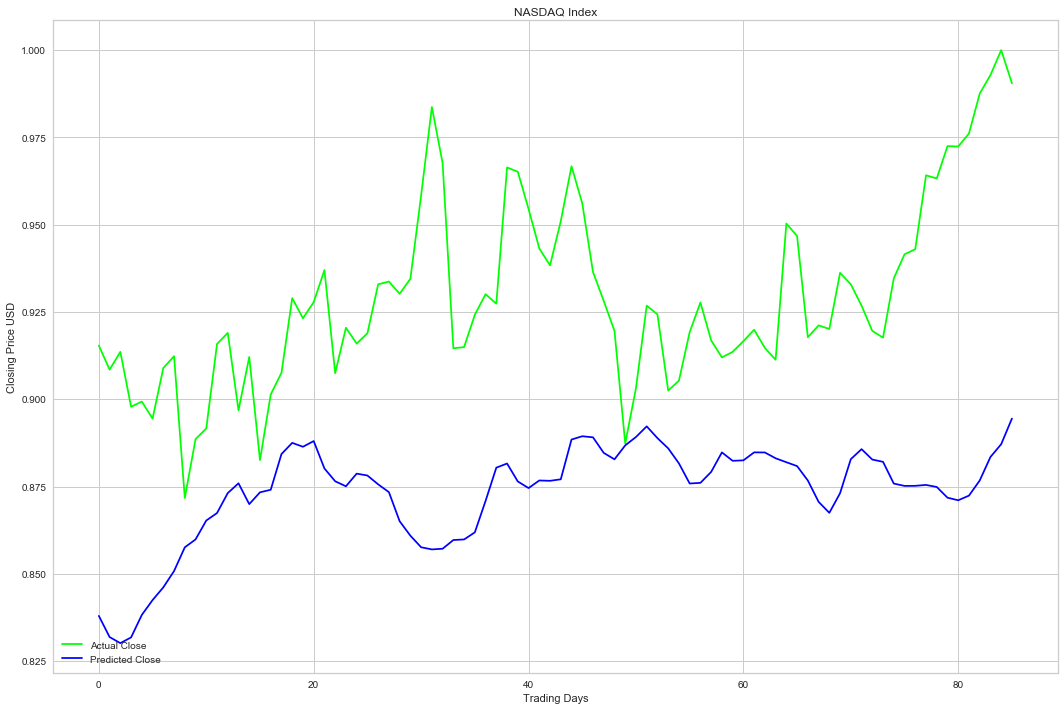

Train Score: 0.07037530 MSE (0.26528343 RMSE)
Test Score: 0.33229312 MSE (0.57644871 RMSE)


In [358]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [310]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

compilation time :  0.03016519546508789
Train on 2232 samples, validate on 70 samples
Epoch 1/5
2232/2232 [==============================] - 54s 24ms/step - loss: 0.0206 - val_loss: 0.0113
Epoch 2/5
2232/2232 [==============================] - 36s 16ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 3/5
2232/2232 [==============================] - 39s 17ms/step - loss: 0.0023 - val_loss: 8.3638e-04
Epoch 4/5
2232/2232 [==============================] - 43s 19ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 5/5
2232/2232 [==============================] - 47s 21ms/step - loss: 0.0013 - val_loss: 0.0022


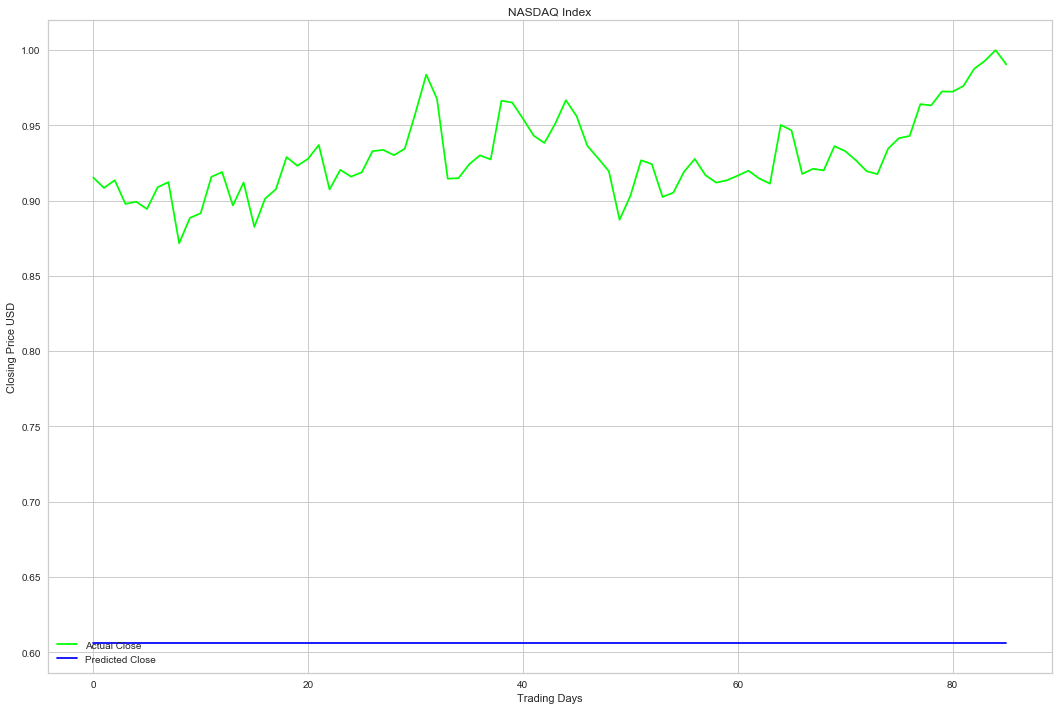

Train Score: 0.00611810 MSE (0.07821829 RMSE)
Test Score: 0.10521307 MSE (0.32436564 RMSE)


In [309]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [227]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

compilation time :  0.051898956298828125
Train on 2048 samples, validate on 64 samples
Epoch 1/5
2048/2048 [==============================] - 45s 22ms/step - loss: 0.0243 - val_loss: 0.0029
Epoch 2/5
2048/2048 [==============================] - 31s 15ms/step - loss: 0.0037 - val_loss: 0.0063
Epoch 3/5
2048/2048 [==============================] - 32s 16ms/step - loss: 0.0014 - val_loss: 0.0088
Epoch 4/5
2048/2048 [==============================] - 34s 17ms/step - loss: 0.0017 - val_loss: 0.0102
Epoch 5/5
2048/2048 [==============================] - 30s 15ms/step - loss: 9.3802e-04 - val_loss: 0.0032


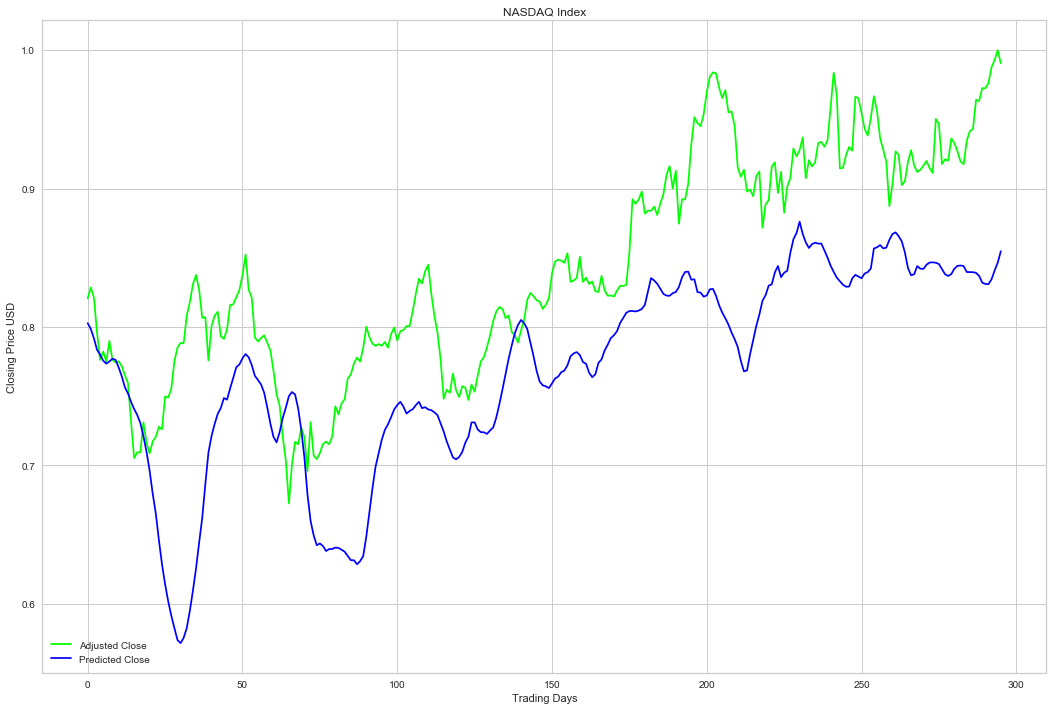

Train Score: 0.00051712 MSE (0.02274019 RMSE)
Test Score: 0.00784555 MSE (0.08857512 RMSE)


In [228]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [229]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

compilation time :  0.04068779945373535
Train on 2048 samples, validate on 64 samples
Epoch 1/5
2048/2048 [==============================] - 37s 18ms/step - loss: 0.0104 - val_loss: 0.0135
Epoch 2/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0020 - val_loss: 4.5318e-04
Epoch 3/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 4/5
2048/2048 [==============================] - 27s 13ms/step - loss: 6.3958e-04 - val_loss: 0.0102
Epoch 5/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0011 - val_loss: 0.0040


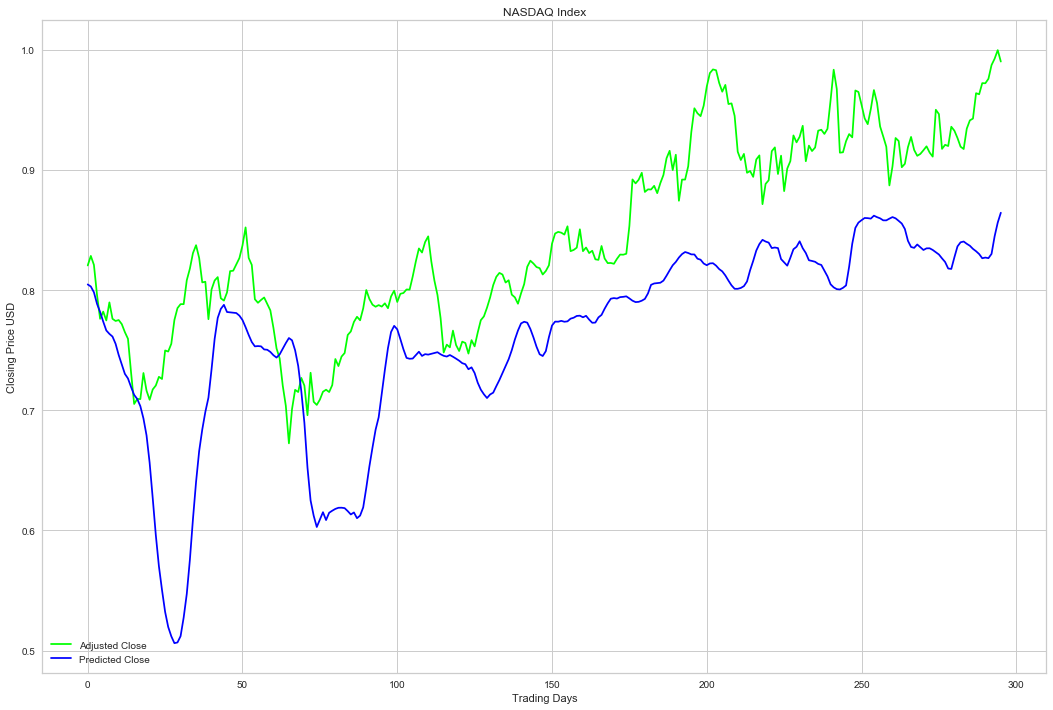

Train Score: 0.00041155 MSE (0.02028681 RMSE)
Test Score: 0.00955270 MSE (0.09773789 RMSE)


In [230]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [231]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
compilation time :  0.04018092155456543
Train on 2048 samples, validate on 64 samples
Epoch 1/5
2048/2048 [==============================] - 49s 24ms/step - loss: 0.0119 - val_loss: 0.0059
Epoch 2/5
2048/2048 [==============================] - 33s 16ms/step - loss: 0.0026 - val_loss: 0.0110
Epoch 3/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0014 - val_loss: 0.0094
Epoch 4/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0014 - val_loss: 0.0107
Epoch 5/5
2048/2048 [==============================] - 28s 14ms/step - loss: 0.0011 - val_loss: 0.0151


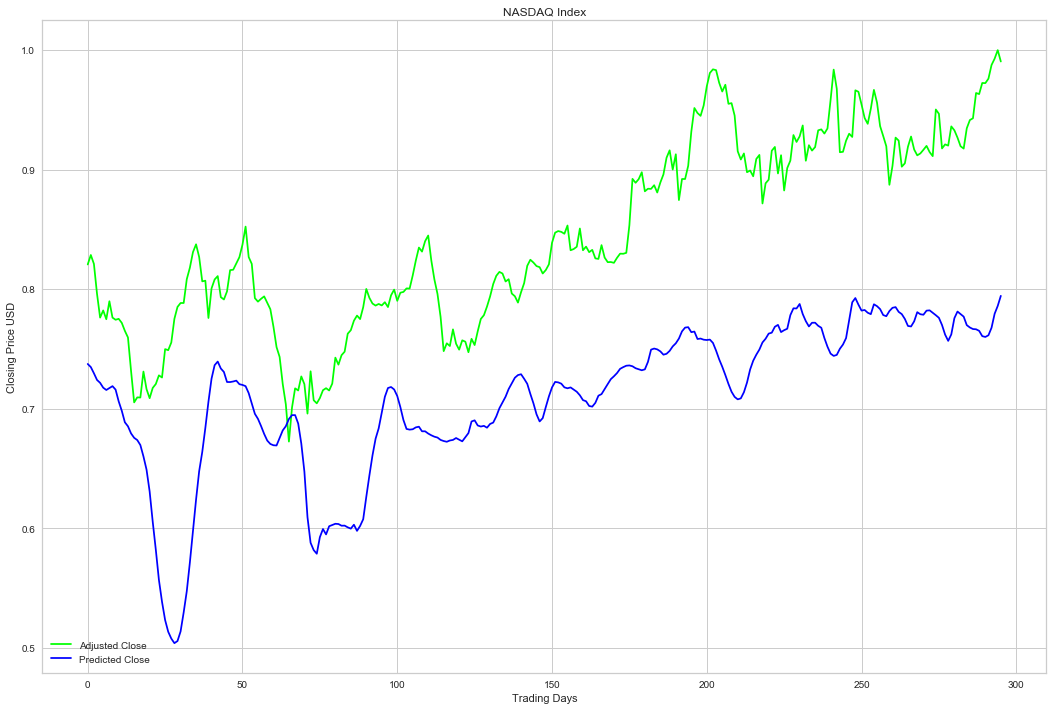

Train Score: 0.00094775 MSE (0.03078554 RMSE)
Test Score: 0.02038053 MSE (0.14276039 RMSE)


In [232]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [233]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.4))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

compilation time :  0.038507938385009766
Train on 2048 samples, validate on 64 samples
Epoch 1/5
2048/2048 [==============================] - 39s 19ms/step - loss: 0.0430 - val_loss: 0.0019
Epoch 2/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0072 - val_loss: 0.0030
Epoch 3/5
2048/2048 [==============================] - 29s 14ms/step - loss: 0.0039 - val_loss: 0.0183
Epoch 4/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0028 - val_loss: 0.0107
Epoch 5/5
2048/2048 [==============================] - 28s 13ms/step - loss: 0.0031 - val_loss: 0.0126


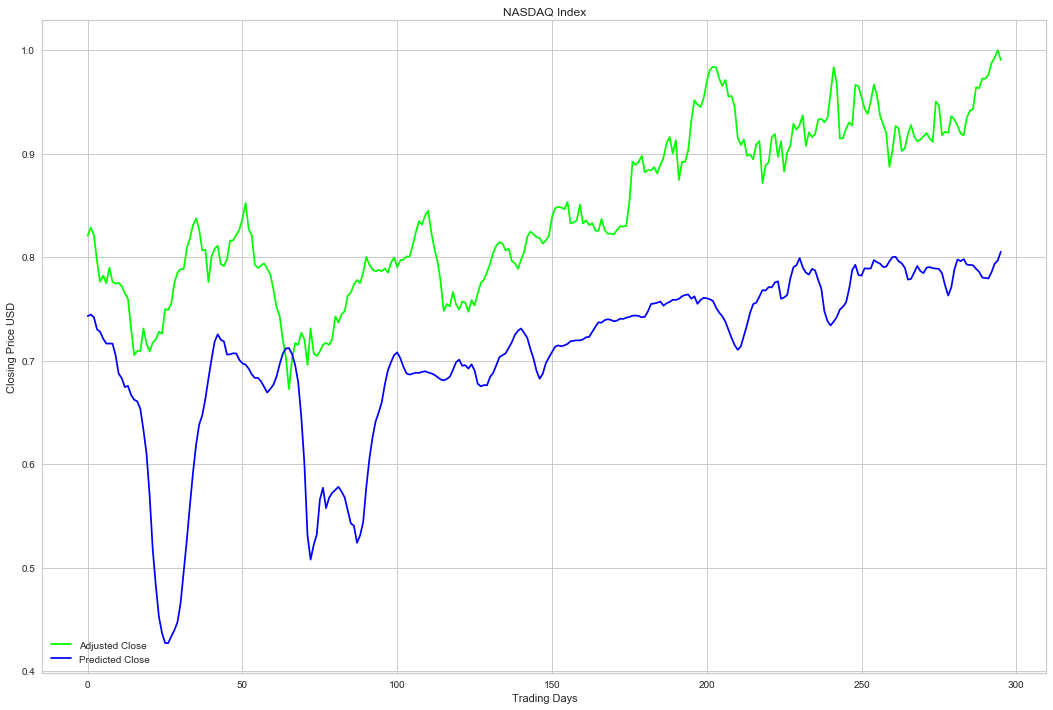

Train Score: 0.00145985 MSE (0.03820795 RMSE)
Test Score: 0.02237273 MSE (0.14957518 RMSE)


In [234]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [236]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

compilation time :  0.04528999328613281
Train on 2048 samples, validate on 64 samples
Epoch 1/5
2048/2048 [==============================] - 41s 20ms/step - loss: 0.0152 - val_loss: 0.0084
Epoch 2/5
2048/2048 [==============================] - 35s 17ms/step - loss: 0.0040 - val_loss: 0.0137
Epoch 3/5
2048/2048 [==============================] - 36s 17ms/step - loss: 0.0023 - val_loss: 4.5975e-04
Epoch 4/5
2048/2048 [==============================] - 33s 16ms/step - loss: 0.0018 - val_loss: 0.0090
Epoch 5/5
2048/2048 [==============================] - 28s 13ms/step - loss: 0.0014 - val_loss: 0.0032


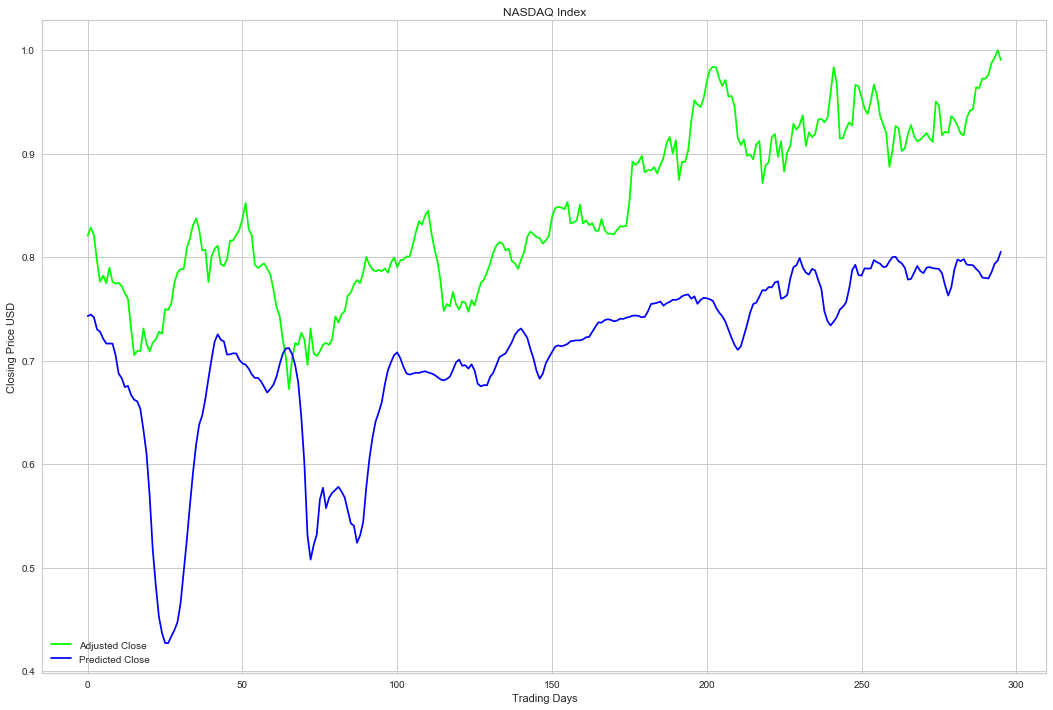

Train Score: 0.00065235 MSE (0.02554107 RMSE)
Test Score: 0.01072852 MSE (0.10357859 RMSE)


In [237]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [244]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('elu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('linear'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

compilation time :  0.04030299186706543
Train on 2048 samples, validate on 64 samples
Epoch 1/5
2048/2048 [==============================] - 43s 21ms/step - loss: 0.0094 - val_loss: 0.0052
Epoch 2/5
2048/2048 [==============================] - 27s 13ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 3/5
2048/2048 [==============================] - 28s 14ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 4/5
2048/2048 [==============================] - 28s 14ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 5/5
2048/2048 [==============================] - 35s 17ms/step - loss: 0.0011 - val_loss: 9.4144e-04


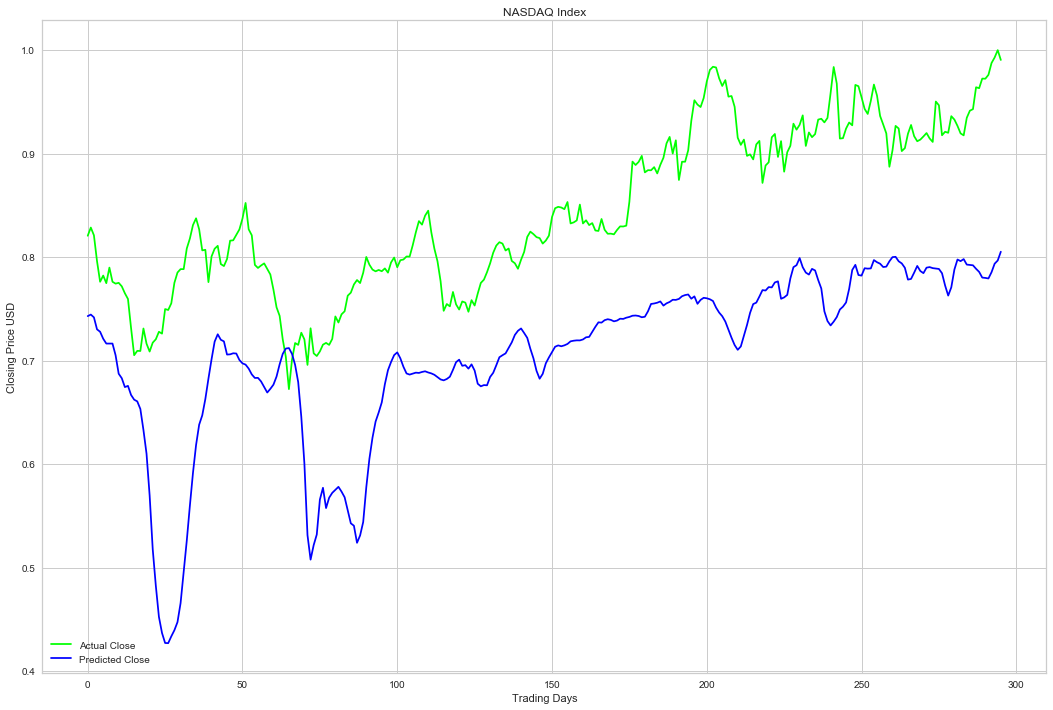

Train Score: 0.05661421 MSE (0.23793740 RMSE)
Test Score: 0.32016956 MSE (0.56583528 RMSE)


In [243]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

## IMPROVEMENT WANTED

## Build the Improved LSTM model

/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


compilation time :  0.04240822792053223
Train on 2006 samples, validate on 106 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


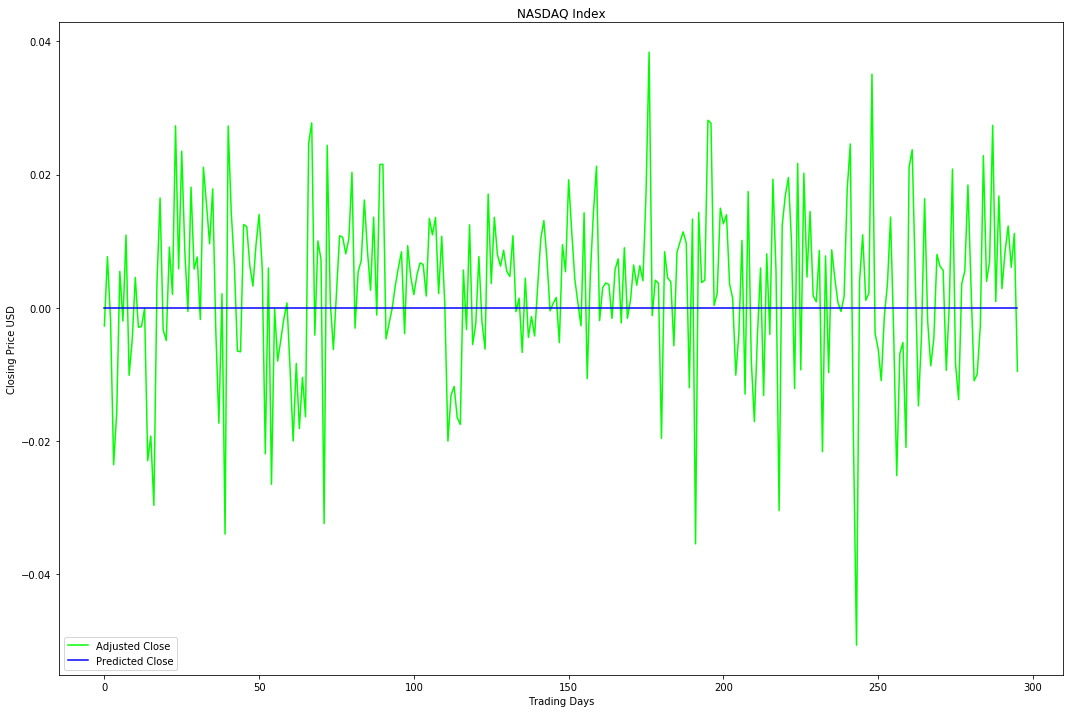

Train Score: 0.00004552 MSE (0.00674668 RMSE)
Test Score: 0.00016235 MSE (0.01274160 RMSE)


In [295]:

new_model=train_test_split_lstm(data1_normalized.drop(['open','Day','close','high','low'],axis=1), prediction_time=5, test_data_size=200, unroll_length=50)
new_model
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))

    

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))

    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

